In [4]:
import pandas as pd
df=pd.read_csv("Cleaned_data.csv",nrows=20000)
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.80047
1    0.19953
Name: proportion, dtype: float64

In [5]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.boxplot(x='loan_status', y='loan_amnt', data=df)
# plt.show()
# sns.histplot(df['int_rate'], kde=True)
# plt.show()
# sns.countplot(x='grade', hue='loan_status', data=df)
# plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['loan_status','grade','sub_grade'],errors='ignore')
y=df['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
X.head()
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print (y_prob)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

[0.2  0.21 0.39 ... 0.36 0.41 0.17]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2653
           1       0.54      0.11      0.18       669

    accuracy                           0.80      3322
   macro avg       0.68      0.54      0.54      3322
weighted avg       0.76      0.80      0.75      3322

ROC AUC Score: 0.6918650347605468


In [8]:
import pandas as pd

# Sample dataset with the most important features for credit risk modeling
sample_data = {
    'loan_amnt': [5000, 10000, 15000, 20000, 12000],
    'funded_amnt': [5000, 10000, 15000, 20000, 12000],
    'int_rate': [10.65, 13.49, 7.90, 15.27, 18.99],
    'installment': [162.87, 234.56, 472.31, 586.45, 386.45],
    'annual_inc': [24000, 55000, 65000, 72000, 36000],
    'dti': [27.65, 1.00, 8.72, 20.00, 12.50],
    'revol_bal': [13648, 1687, 2956, 5598, 2500],
    'revol_util': [83.7, 9.4, 53.9, 45.0, 30.1],
    'open_acc': [3, 3, 2, 10, 5],
    'total_acc': [9, 4, 10, 37, 12],
    'delinq_2yrs': [0, 0, 0, 1, 0],
    'inq_last_6mths': [1, 0, 0, 2, 1],
    'pub_rec': [0, 0, 0, 0, 0],
    'term': [36, 60, 36, 60, 36],
    'emp_length': [10, 2, 5, 8, 1],
    'home_ownership': ['RENT', 'MORTGAGE', 'RENT', 'RENT', 'OWN'],
    'verification_status': ['Verified', 'Source Verified', 'Verified', 'Not Verified', 'Source Verified'],
    'purpose': ['credit_card', 'debt_consolidation', 'credit_card', 'home_improvement', 'other'],
    'application_type': ['Individual', 'Individual', 'Individual', 'Individual', 'Individual'],
    'grade': ['B', 'C', 'A', 'D', 'E'],
    'sub_grade': ['B2', 'C4', 'A1', 'D5', 'E1'],
    'loan_status': [0, 1, 0, 1, 0]
}

df_sample = pd.DataFrame(sample_data)

# Save to CSV
file_path = "/Users/shashankdubey/Documents/Finance Project/sample_data.csv"
df_sample.to_csv(file_path, index=False)

In [9]:
# Simulate a loan approval strategy
def simulate_profit(prob, actual, threshold=0.4):
    if prob > threshold:
        return 0  # reject loan = no profit/loss
    else:
        return -10000 if actual == 1 else 1000  # default → loss, else gain

# Apply over test set
profits = [simulate_profit(p, a) for p, a in zip(y_prob, y_test)]
print("💰 Total simulated profit:", sum(profits))


💰 Total simulated profit: -2585000


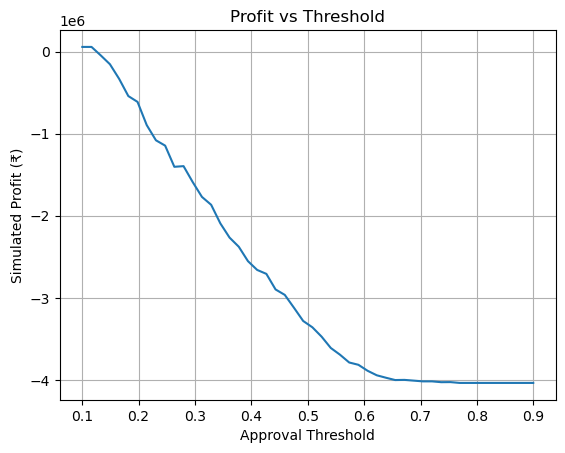

In [10]:
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.linspace(0.1, 0.9, 50)
profits = []

for t in thresholds:
    p = [simulate_profit(p, a, t) for p, a in zip(y_prob, y_test)]
    profits.append(sum(p))

plt.plot(thresholds, profits)
plt.xlabel("Approval Threshold")
plt.ylabel("Simulated Profit (₹)")
plt.title("Profit vs Threshold")
plt.grid(True)